<h1><center><u>RESTAURANT REVIEWS</u></center></h1>

<h2><center>Libraries Used</center></h2>

In [1]:
library(tm) // provides set of predefined sources
library(SnowballC)
library(randomForest)
library(caTools)
library(rpart)
library(e1071)
library(MLmetrics)

Warning message:
"package 'tm' was built under R version 3.6.1"Loading required package: NLP
Warning message:
"package 'randomForest' was built under R version 3.6.1"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'caTools' was built under R version 3.6.1"Warning message:
"package 'e1071' was built under R version 3.6.1"Warning message:
"package 'MLmetrics' was built under R version 3.6.1"
Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall



<h2><center>Importing and Cleaning the Data</center></h2>

In [2]:
#importing the data
data = read.delim("Restaurant_Reviews.tsv",quote = "",stringsAsFactors = FALSE)

In [3]:
head(data)

Review,Liked
Wow... Loved this place.,1
Crust is not good.,0
Not tasty and the texture was just nasty.,0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
The selection on the menu was great and so were the prices.,1
Now I am getting angry and I want my damn pho.,0


In [4]:
str(data)

'data.frame':	1000 obs. of  2 variables:
 $ Review: chr  "Wow... Loved this place." "Crust is not good." "Not tasty and the texture was just nasty." "Stopped by during the late May bank holiday off Rick Steve recommendation and loved it." ...
 $ Liked : int  1 0 0 1 1 0 0 0 1 1 ...


In [5]:
#cleaning the data
corpous = VCorpus(VectorSource(data$Review))
corpous = tm_map(corpous,content_transformer(tolower)) # converting all text to lower alphabets
corpous = tm_map(corpous,removeNumbers)# removing all numeric data 
corpous = tm_map(corpous,removePunctuation)# removing all punctuation marks
corpous = tm_map(corpous,removeWords,stopwords()) # removing extra words like pronouns, articles etc.
corpous = tm_map(corpous,stemDocument)# converting all words to there root words
corpous = tm_map(corpous,stripWhitespace) # removing white spaces

<h3><b>Created word cloud to understand more about data</b></h3>

Warning message:
"package 'wordcloud' was built under R version 3.6.1"Loading required package: RColorBrewer


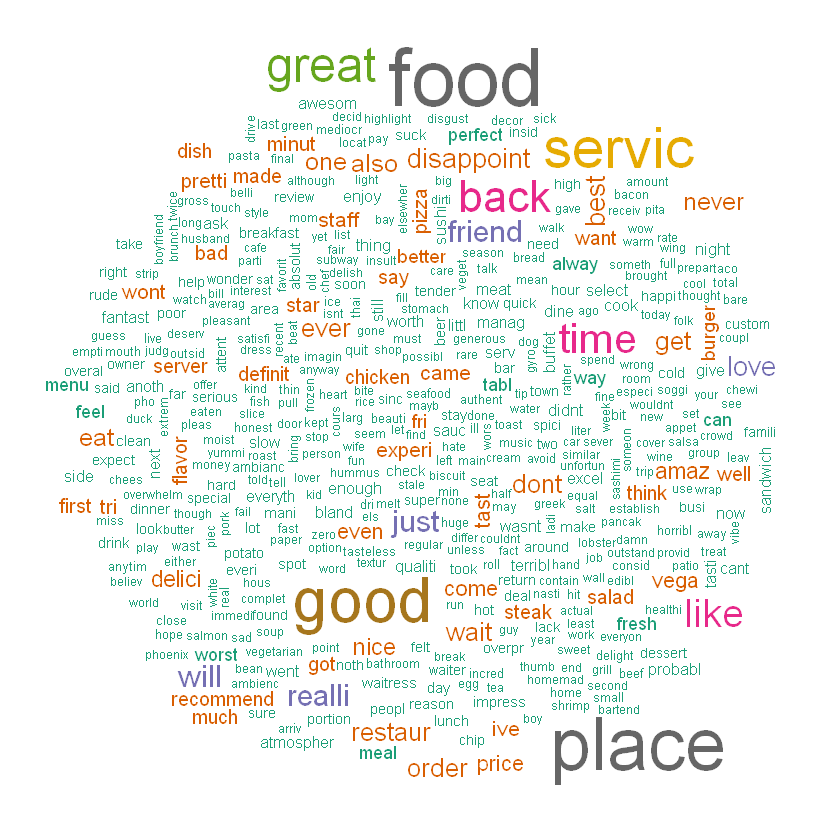

In [6]:
#install.packages("wordcloud")
library(wordcloud)
dtm = TermDocumentMatrix(corpous)
m = as.matrix(dtm)
v = sort(rowSums(m),decreasing = TRUE)
d = data.frame(word = names(v),freq = v)
wordcloud(words = d$word,freq = d$freq,colors = brewer.pal(8,"Dark2"))

In [7]:
dtm = DocumentTermMatrix(corpous)# creating sparse matrix
dtm = removeSparseTerms(dtm,0.999)
dtm

<<DocumentTermMatrix (documents: 1000, terms: 691)>>
Non-/sparse entries: 4549/686451
Sparsity           : 99%
Maximal term length: 12
Weighting          : term frequency (tf)

<h2>We have 691 unique words after cleaning the data and allowing 99% Sparsity.</h2>

In [8]:
dataset = as.data.frame(as.matrix(dtm))#converting again as data frame
dataset$Liked = data$Liked

In [9]:
head(dataset)

absolut,acknowledg,actual,ago,almost,also,although,alway,amaz,ambianc,...,wow,wrap,wrong,year,yet,youd,your,yummi,zero,Liked
0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dim(dataset)

[1] 1000  692

In [11]:
# Encoding the target feature as factor
dataset$Liked = factor(dataset$Liked, levels = c(0, 1))

In [12]:
# Splitting the dataset into the Training set and Test set
set.seed(999)
split = sample.split(dataset$Liked, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

<h2>Classifier 1: Random Forest</h2>

In [13]:
# Fitting classifier to the Training set
classifier1 = randomForest(x = training_set[-692],y = training_set$Liked,ntree = 30)

In [14]:
# Predicting the Test set results
y_pred1 = predict(classifier1, newdata = test_set[-692])

# Making the Confusion Matrix
cm1 = table(test_set[, 692], y_pred1)
cm1

   y_pred1
     0  1
  0 83 17
  1 25 75

In [15]:
Accuracy(y_pred1,test_set[,692])

[1] 0.79

In [16]:
F1_Score(test_set[,692],y_pred1)

[1] 0.7980769

<h2>Classifier 2: Decision Tree </h2>

In [17]:
# Fitting classifier to the Training set
classifier2 = rpart(formula = Liked~.,data = training_set) 

In [18]:
# Predicting the Test set results
y_pred2 = predict(classifier2, newdata = test_set[-692],type = "class")

# Making the Confusion Matrix
cm2 = table(test_set[,692],y_pred2)
cm2

   y_pred2
     0  1
  0 91  9
  1 40 60

In [19]:
Accuracy(y_pred2,test_set[,692])

[1] 0.755

In [20]:
F1_Score(test_set[,692],y_pred2)

[1] 0.7878788

<h2>Classifier 3: Naive Bayes</h2>

In [21]:
# Fitting classifier to the Training set
classifier3 = naiveBayes(x = training_set[-692],y = training_set$Liked)

In [22]:
# Predicting the Test set results
y_pred3 = predict(classifier3, newdata = test_set[-692])

In [23]:
# Making the Confusion Matrix
cm3 = table(test_set[, 692], y_pred3)
cm3

   y_pred3
     0  1
  0 13 87
  1 15 85

In [24]:
Accuracy(y_pred3,test_set[,692])

[1] 0.49

In [25]:
F1_Score(test_set[,692],y_pred3)

[1] 0.203125

<h2>Performance Comparision</h2><br>
<h3><ul><li> Random Forest Classification: 78.5%</li><br>
    <li>Decision Tree Classification: 75.5%</li><br>
    <li>Naive Bayes Classification: 49%</li></ul></h3>